In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
np.random.seed(0)

# Data Preprocessing

#### Data Augmentation and Feature Extraction (using MFCC)

In [2]:
# Function to extract MFCC features
def extract_mfcc(file_path, augmentation=False):
    # Load audio file
    audio_data, sr = librosa.load(file_path, sr=None)
    
    # Apply augmentation if specified
    if augmentation:
        # Example: Time stretching
        audio_data_augmented = librosa.effects.time_stretch(audio_data, rate = 0.8 )#rate = np.random.uniform(0.8, 1.2))
        
        # Example: Pitch shifting (random shift between -2 to 2 semitones)
        #audio_data_augmented = librosa.effects.pitch_shift(audio_data_stretched, sr=sr,n_steps=np.random.uniform(-2, 2))
    else:
        audio_data_augmented = audio_data
        
    mfccs = librosa.feature.mfcc(y=audio_data_augmented, sr=sr, n_mfcc=40)
    mfccs = np.mean(mfccs.T, axis=0)  # Taking mean of MFCCs
    return mfccs

In [3]:
# Path to the dataset folder
dataset_path = 'datasets'

# Lists to hold features(Original+Agumented) and features_original
features = []
features_original = []

# Loop through each folder and file
for label in ['healthy', 'stimmlippenkarzinom']:
    folder_path = os.path.join(dataset_path, label)
    files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]
    for file_name in tqdm(files, desc=f'Processing {label} files'):
        file_path = os.path.join(folder_path, file_name)
        # Extract original MFCC features
        mfccs_original = extract_mfcc(file_path, augmentation=False)
        features_original.append([mfccs_original, label])
        features.append([mfccs_original, label])
        
        # Extract augmented MFCC features
        mfccs_augmented = extract_mfcc(file_path, augmentation=True)
        features.append([mfccs_augmented, label])

Processing stimmlippenkarzinom files: 100%|████████████████████████████████████████████| 84/84 [00:02<00:00, 29.69it/s]


#### DataFrame of original features

In [4]:
# Create a DataFrame of original features
df_original = pd.DataFrame(features_original,columns=['feature','class'])
df_original

,feature,class
0,"[-248.99207, 237.56853, -1.1738869, -11.471321...",healthy
1,"[-252.30412, 253.97157, 20.097445, -6.105489, ...",healthy
2,"[-227.89868, 244.99779, 10.715789, -5.6922073,...",healthy
3,"[-210.71898, 251.33025, 23.069086, 2.5758412, ...",healthy
4,"[-364.6534, 190.22061, 49.5106, 24.282656, -2....",healthy
...,...,...
227,"[-181.0966, 154.76138, 29.76749, 61.42796, -36...",stimmlippenkarzinom
228,"[-206.923, 152.67967, -27.04416, 24.996017, -3...",stimmlippenkarzinom
229,"[-245.24911, 186.41487, 18.660599, 33.401836, ...",stimmlippenkarzinom
230,"[-206.56386, 186.28462, -5.379292, 24.425085, ...",stimmlippenkarzinom


In [5]:
X=np.array(df_original['feature'].tolist())
y=np.array(df_original['class'].tolist())
y=np.array(pd.get_dummies(y,drop_first=True))

#### Split Original Dataset to store Unseen data for evaluation later

In [6]:
#Keeping some of the unseen test data (without Agumentation) for evaluating the model
from sklearn.model_selection import train_test_split
X_train_original,X_test_original,y_train_original,y_test_original=train_test_split(X, y, test_size=0.4, stratify=y, random_state=1)
print("X_test_original shape: ",X_test_original.shape)
print("y_test_original shape: ",y_test_original.shape)

X_test_original shape:  (93, 40)
y_test_original shape:  (93, 1)


#### DataFrame of features including both Original and Agumented data

In [7]:
# Create a DataFrame of features including both Original + Agumented
df = pd.DataFrame(features,columns=['feature','class'])

# Display the DataFrame
df

,feature,class
0,"[-248.99207, 237.56853, -1.1738869, -11.471321...",healthy
1,"[-290.71387, 236.69287, 4.033228, -4.72829, -1...",healthy
2,"[-252.30412, 253.97157, 20.097445, -6.105489, ...",healthy
3,"[-284.68875, 254.85313, 28.576492, -3.73867, -...",healthy
4,"[-227.89868, 244.99779, 10.715789, -5.6922073,...",healthy
...,...,...
459,"[-280.3617, 185.26508, 24.378874, 34.139507, -...",stimmlippenkarzinom
460,"[-206.56386, 186.28462, -5.379292, 24.425085, ...",stimmlippenkarzinom
461,"[-244.44865, 181.889, -2.1053293, 24.567722, -...",stimmlippenkarzinom
462,"[-230.50331, 176.82268, 3.7989209, 40.36804, -...",stimmlippenkarzinom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  464 non-null    object
 1   class    464 non-null    object
dtypes: object(2)
memory usage: 7.4+ KB


In [9]:
X=np.array(df['feature'].tolist())
y=np.array(df['class'].tolist())

In [10]:
X.shape

(464, 40)

In [11]:
y=np.array(pd.get_dummies(y,drop_first=True))

In [12]:
y.shape

(464, 1)

#### Split the dataset for model training

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [14]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (371, 40)
X_test shape:  (93, 40)
y_train shape:  (371, 1)
y_test shape:  (93, 1)


# Model Creation

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
tf.random.set_seed(0)

In [16]:
model=Sequential()
#first layer
model.add(Dense(124,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#second layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#third layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               5084      
                                                                 
 activation (Activation)     (None, 124)               0         
                                                                 
 dropout (Dropout)           (None, 124)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8000      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [20]:
num_epochs = 150
num_batch_size = 32

#checkpointer = ModelCheckpoint(filepath='audio_classification_checkpoint.hdf5',verbose=1, save_best_only=True)
start=datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test))#, callbacks=[checkpointer])

duration = datetime.now()-start
print("Training completed in time: ",duration)

Epoch 1/150


12/12 [==============================] - 1s 19ms/step - loss: 17.3746 - accuracy: 0.5660 - val_loss: 4.1452 - val_accuracy: 0.6452
Epoch 2/150
12/12 [==============================] - 0s 5ms/step - loss: 12.5651 - accuracy: 0.5741 - val_loss: 2.6641 - val_accuracy: 0.6452
Epoch 3/150
12/12 [==============================] - 0s 4ms/step - loss: 10.1982 - accuracy: 0.5418 - val_loss: 1.4896 - val_accuracy: 0.6344
Epoch 4/150
12/12 [==============================] - 0s 5ms/step - loss: 7.6564 - accuracy: 0.5687 - val_loss: 1.2304 - val_accuracy: 0.6344
Epoch 5/150
12/12 [==============================] - 0s 5ms/step - loss: 6.6579 - accuracy: 0.5660 - val_loss: 1.1840 - val_accuracy: 0.6344
Epoch 6/150
12/12 [==============================] - 0s 5ms/step - loss: 5.8856 - accuracy: 0.5337 - val_loss: 1.1498 - val_accuracy: 0.6237
Epoch 7/150
12/12 [==============================] - 0s 4ms/step - loss: 4.6446 - accuracy: 0.5822 - val_loss: 1.0630 - val_accuracy: 0.6237
Epoch 8

# Model Evaluation

#### Of Unseen Data

In [21]:
# Evaluating our model on the unseen data that we stored above
test_loss, test_accuracy = model.evaluate(X_test_original, y_test_original, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0


3/3 [==============================] - 0s 3ms/step


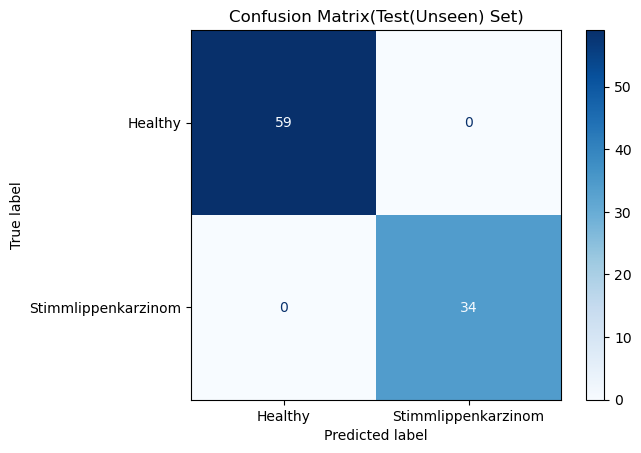

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from the model
y_pred_test = model.predict(X_test_original)
y_pred_binary = (y_pred_test > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
cm = confusion_matrix(y_test_original, y_pred_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Stimmlippenkarzinom'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix(Test(Unseen) Set)')
plt.show()

#### Of Training Data

In [23]:
# Evaluating our model on the train data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Train Accuracy: ",train_accuracy)

Train Accuracy:  0.9973045587539673


12/12 [==============================] - 0s 1ms/step


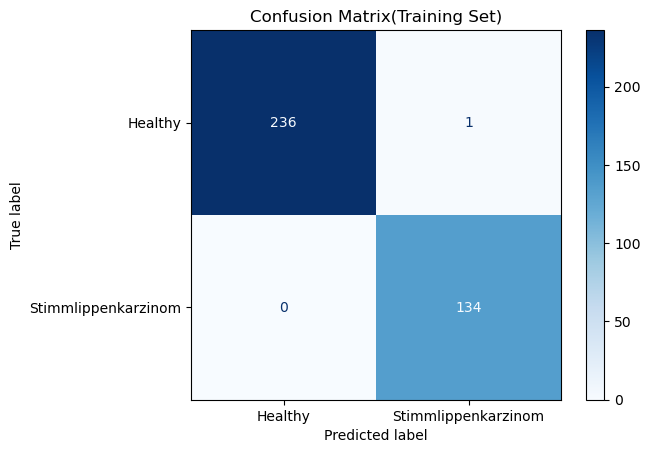

In [24]:
# Get predictions from the model
y_pred_train = model.predict(X_train)
y_pred_binary = (y_pred_train > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
cm = confusion_matrix(y_train, y_pred_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Stimmlippenkarzinom'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix(Training Set)')
plt.show()